# Benchmarking `libjpeg-turbo` 📊

In [ ]:
%run benchmark_libjpeg-turbo_complete.py

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which DCT method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [1]:
# --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    '1920x1080': (1920, 1080),
    '3840x2160': (3840, 2160),
}

RESOLUTION_TO_FILENAME = {
    '1280x720': 'frame_hd.rgb',
    '1920x1080': 'frame_fullhd.rgb',
    '3840x2160': 'frame_ultrahd.rgb',
}

# Parameters to benchmark
QUALITIES = range(10, 101, 1)
DCT_METHODS = ['int', 'fast', 'float']
SUBSAMPLINGS = ['4:4:4', '4:2:2', '4:2:0']
RESTART_INTERVALS = range(0, 8, 1)

SUBSAMPLING_TO_PARAM = {
    '4:4:4': '444',
    '4:2:2': '422',
    '4:2:0': '420'
}

In [2]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results_libjpeg-turbo_complete.csv')
df.head()

,Resolution,Quality,DCT,Restart Interval,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
0,1280x720,10,int,0,4:4:4,10,0.002774,0.000063,0.000001,0.001800,0.000028,0.000001,47.282,27.980398,0.797306,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
1,1280x720,10,int,1,4:4:4,10,0.002779,0.000015,0.000001,0.001872,0.000029,0.000001,47.514,27.980398,0.797306,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
2,1280x720,10,int,2,4:4:4,10,0.002803,0.000015,0.000001,0.001965,0.000030,0.000001,47.389,27.980398,0.797306,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
3,1280x720,10,int,4,4:4:4,10,0.002808,0.000020,0.000003,0.001891,0.000029,0.000004,47.339,27.980398,0.797306,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
4,1280x720,10,int,8,4:4:4,10,0.002810,0.000016,0.000004,0.001887,0.000027,0.000002,47.308,27.980398,0.797306,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [4]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

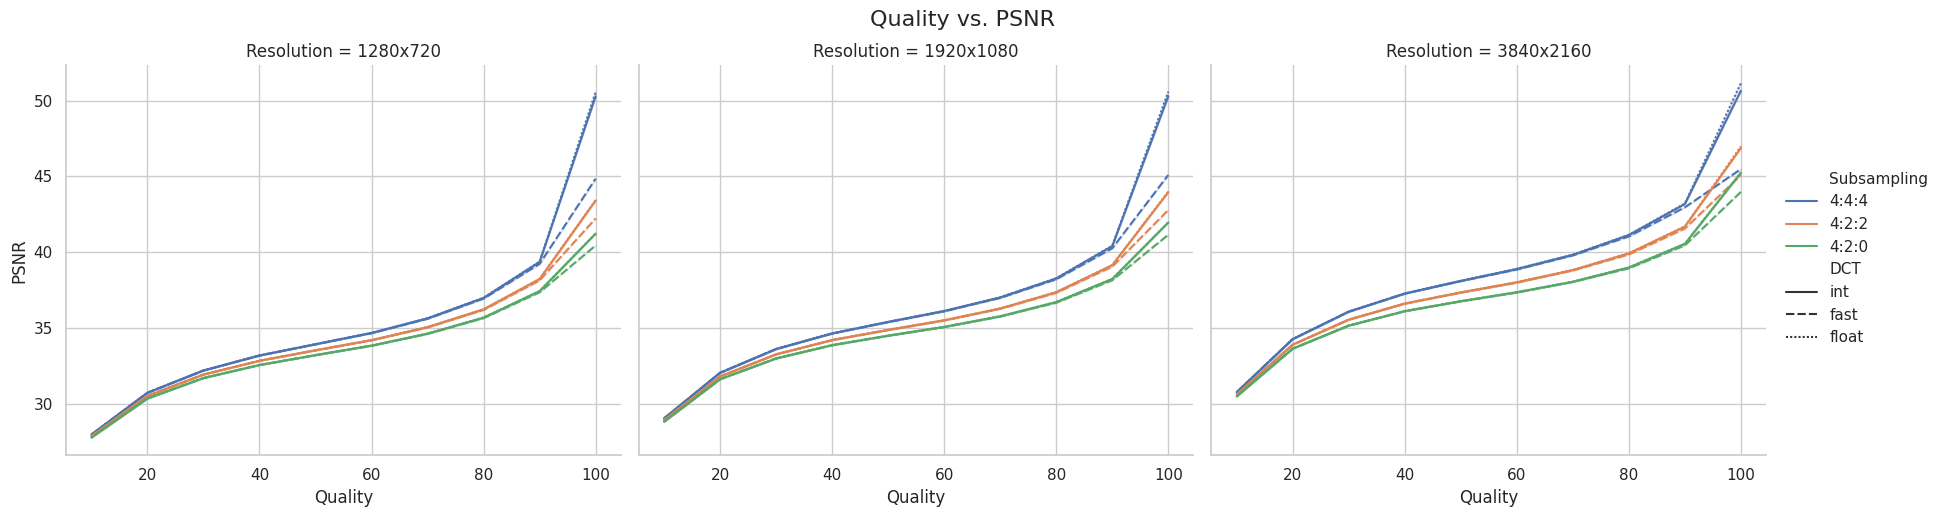

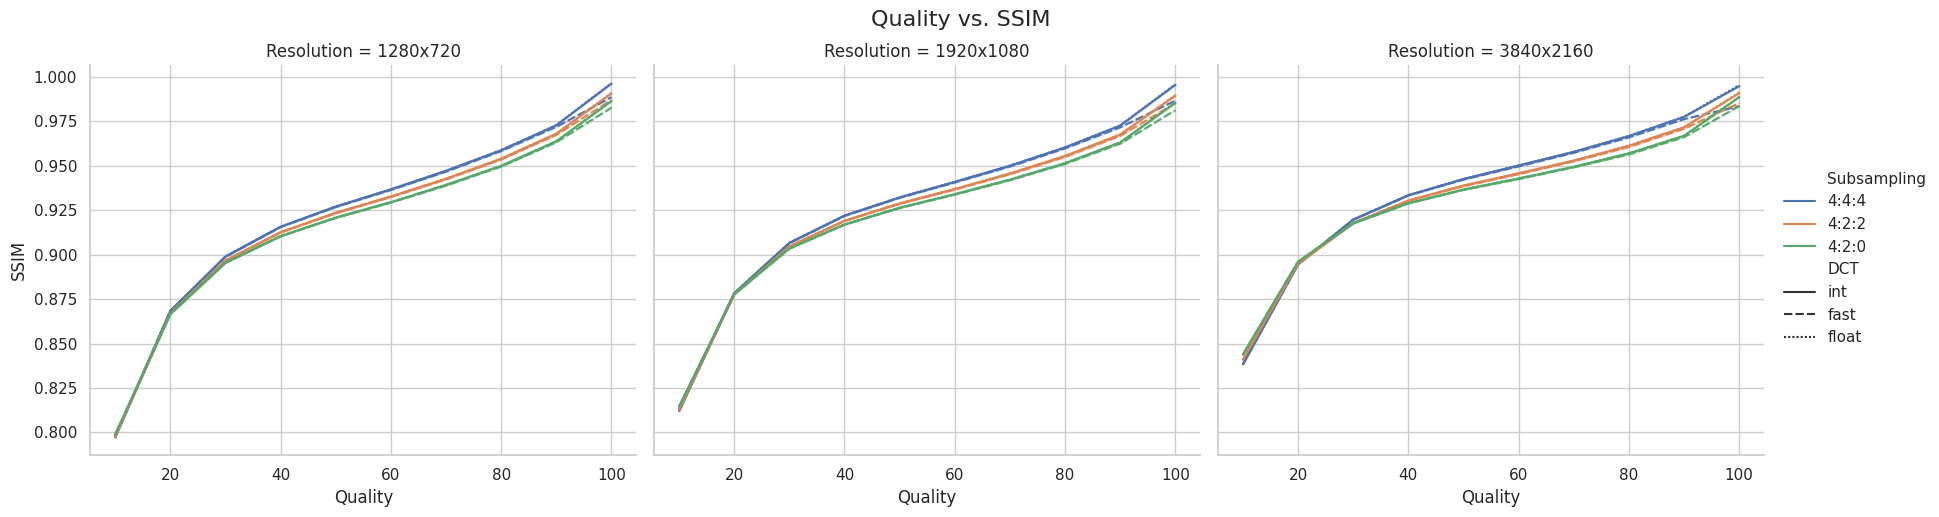

In [5]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    hue='Subsampling',
    style='DCT',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    hue='Subsampling',
    style='DCT',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


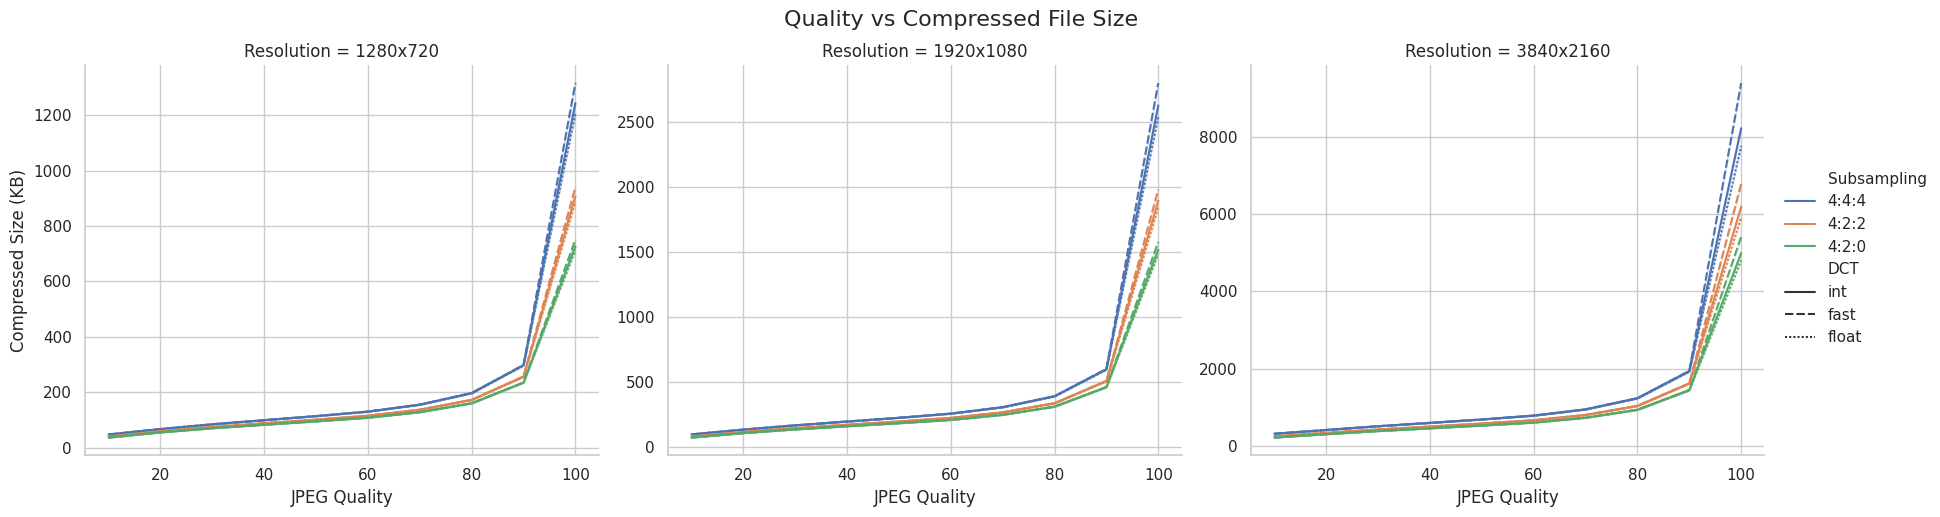

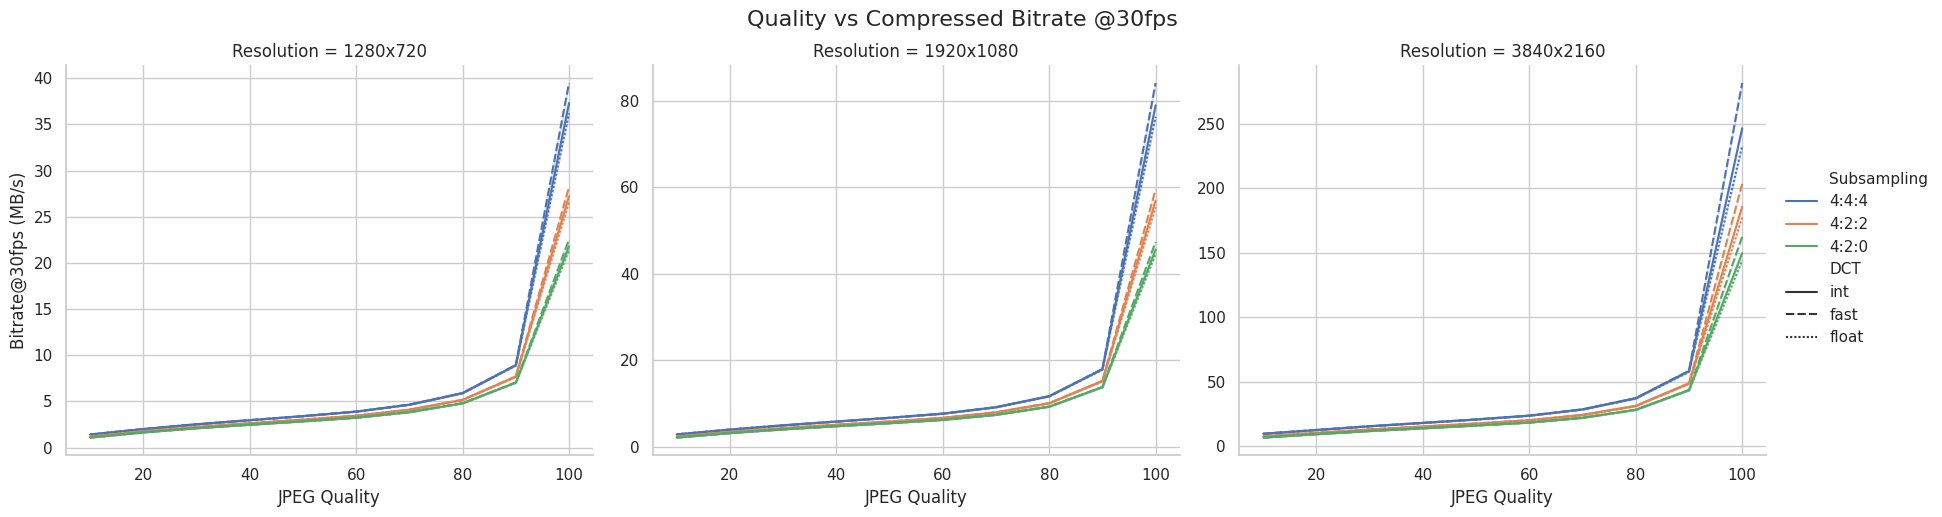

In [6]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    hue='Subsampling',
    style='DCT',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    hue='Subsampling',
    style='DCT',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

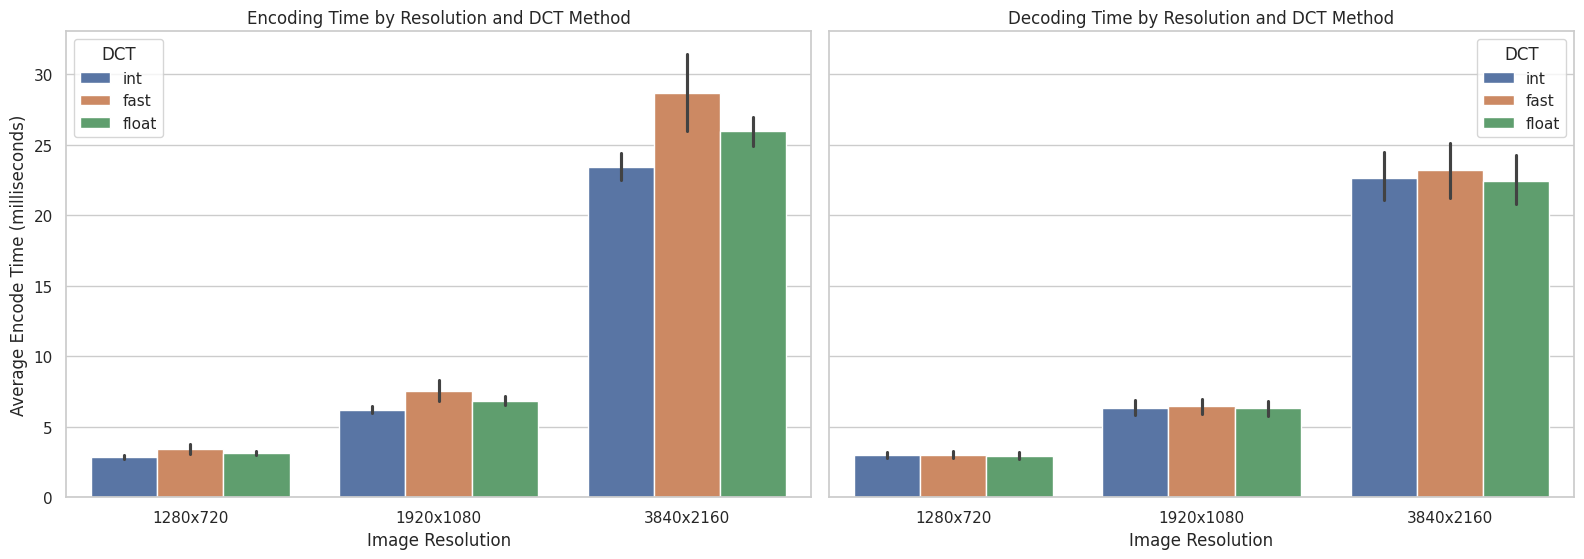

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Plot 1: Encoding time by Resolution and DCT method
sns.barplot(
    data=df,
    x='Resolution',
    y=df['Avg Encode Time (s)'] * 1000,
    hue='DCT',
    order=RESOLUTIONS.keys(),
    ax=ax[0]
)
ax[0].set_title('Encoding Time by Resolution and DCT Method')
ax[0].set_ylabel('Average Encode Time (milliseconds)')
ax[0].set_xlabel('Image Resolution')
# Plot 2: Decoding time by Resolution and DCT method
sns.barplot(
    data=df,
    x='Resolution',
    y=df['Avg Decode Time (s)'] * 1000,
    hue='DCT',
    order=RESOLUTIONS.keys(),
    ax=ax[1]
)
ax[1].set_title('Decoding Time by Resolution and DCT Method')
ax[1].set_ylabel('Average Decode Time (milliseconds)')
ax[1].set_xlabel('Image Resolution')
plt.tight_layout(rect=[0.0, 0.0, 1.0, 0.96])
plt.show()

We can see from the graphs above that, in general, the integer DCT method yields the fastest results on average. For this reason, we will use it for the next visualizations.

In [8]:
df = df[df['DCT'] == 'int']

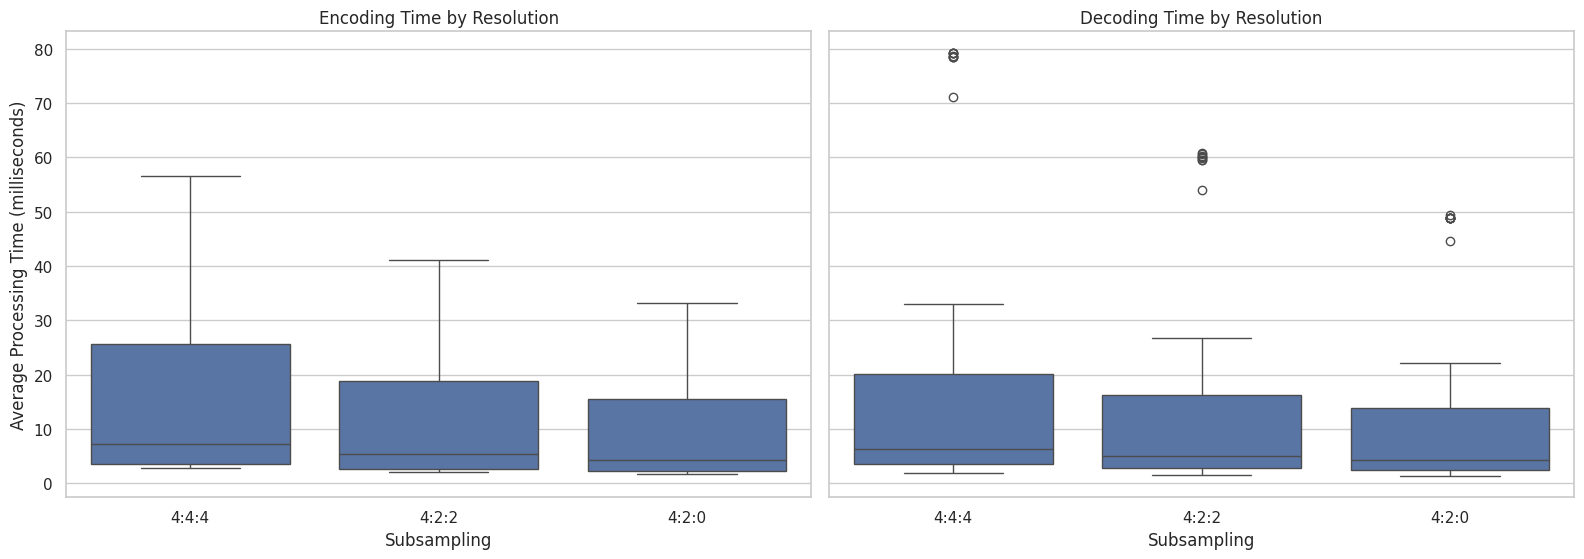

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Plot #1: Encoding time by Subsampling method
sns.boxplot(
    data=df,
    x='Subsampling',
    y=df['Avg Encode Time (s)'] * 1000,
    order=SUBSAMPLINGS,
    ax=ax[0]
)
ax[0].set_title('Encoding Time by Resolution')
ax[0].set_ylabel('Average Processing Time (milliseconds)')

# Plot #2: Decoding time by Subsampling method
sns.boxplot(
    data=df,
    x='Subsampling',
    y=df['Avg Decode Time (s)'] * 1000,
    order=SUBSAMPLINGS,
    ax=ax[1]
)
ax[1].set_title('Decoding Time by Resolution')
plt.tight_layout(rect=[0.0, 0.0, 1.0, 0.96])
plt.show()

As we expected, encoding and decoding in 4:2:0 is the fastest, so we will perform our remaining analysis fixed on this subsampling setting.

In [10]:
df = df[df['Subsampling'] == '4:2:0']

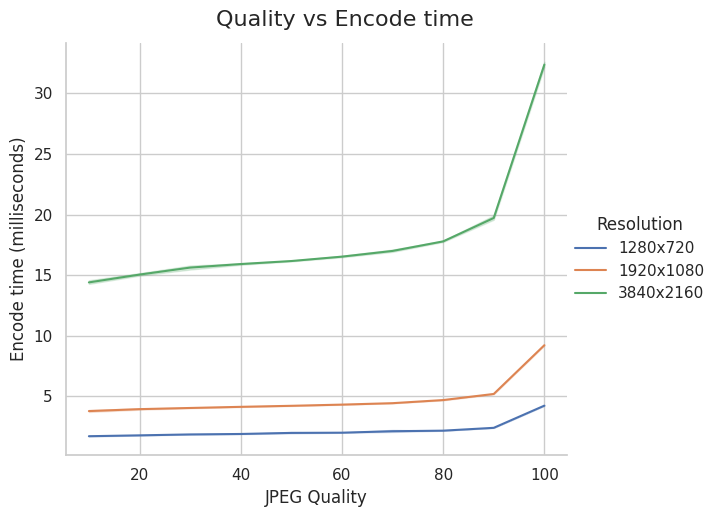

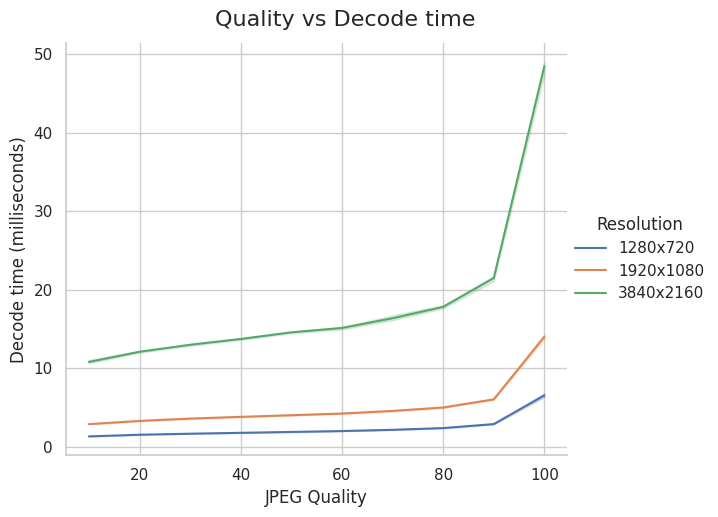

In [11]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    hue='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    hue='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
plt.show()

In [12]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 2]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 2]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,DCT,Restart Interval,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
423,1280x720,60,int,0,4:2:0,10,0.002002,0.000018,0.000001,0.001966,0.000024,0.000003,108.148,33.849148,0.929510,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
343,1280x720,50,int,1,4:2:0,10,0.001961,0.000015,0.000001,0.001930,0.000023,0.000001,95.111,33.222874,0.920854,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
345,1280x720,50,int,4,4:2:0,10,0.001929,0.000017,0.000002,0.001915,0.000025,0.000001,94.966,33.222874,0.920854,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
346,1280x720,50,int,8,4:2:0,10,0.001938,0.000017,0.000001,0.001959,0.000023,0.000001,94.936,33.222874,0.920854,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
348,1280x720,50,int,32,4:2:0,10,0.001929,0.000017,0.000001,0.001918,0.000023,0.000001,94.944,33.222874,0.920854,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [13]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 1.5 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1.5]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,DCT,Restart Interval,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
25,1280x720,10,int,64,4:2:0,10,0.001662,0.00002,0.000001,0.001337,0.000028,0.000001,36.351,27.786446,0.798781,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [14]:
# Clean up the generated directories
try:
    shutil.rmtree('raw_images')
    shutil.rmtree('temp_files')
    print("\n🧹 Cleaned up temporary files and directories.")
except OSError as e:
    print(f"Error during cleanup: {e}")


🧹 Cleaned up temporary files and directories.
